This notebook roughly follows [Detecting opinion spams and fake news ... (2017)](https://www.researchgate.net/publication/322128415_Detecting_opinion_spams_and_fake_news_using_text_classification) by copy-pasting some code from CodeBasic's [videos](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX) and [notebooks](https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/10_bag_of_n_grams.ipynb).

<div style="color:red;">Please download the Kaggle dataset and LIAR dataset first.</div>

# Import the python libraries

In [ ]:
# importing libraries being used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in datasets

In [2]:
# The first dataset is the LIAR dataset, which is a dataset of fact-checked statements.
liar_df = pd.read_csv('./Datasets/liar_dataset/train.tsv', sep='\t')
liar_df.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']
liar_df.head()

,id,label,statement,subject,speaker,job_title,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [3]:
# Removing the columns that are not needed for the analysis, keepink only the statement and the label
condensed_liar = pd.DataFrame()
condensed_liar[['Label','Statement']] = liar_df.iloc[: , [1, 2]].copy()

# Creating a new column with the truth value of the statement being only true or false (1 or 0):
condensed_liar['Truth'] = condensed_liar.Label.map({
     'pants-fire': 0,
     'false': 0,
     'mostly-false': 0,
     'half-true': 0,
     'barely-true': 1,
     'mostly-true': 1,
     'true': 1
})
condensed_liar.head()

,Label,Statement,Truth
0,half-true,When did the decline of coal start? It started...,0
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",1
2,false,Health care reform legislation is likely to ma...,0
3,half-true,The economic turnaround started at the end of ...,0
4,true,The Chicago Bears have had more starting quart...,1


In [4]:
# The second dataset is the Kaggle dataset, which is a dataset of news articles.
news_df = pd.read_csv('./Datasets/fake-news/train.csv',index_col=0)
news_df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Extracting grammatical error 

We are goint to use some of the packages listed here: https://blog.sapling.ai/python-spelling-and-grammar-checkers/ 

In [5]:
# Using python packages to the number of grammar errors in each statement
# The first package is LanguageTool, which is a grammar checker for English, German, Polish, Dutch, Romanian, and a lot more languages.
# The second package is Sapling, which is a grammar checker for English.
# Both packages are free to use, but they have a limit of 1000 requests per day.
# The code below is an example of how to use the packages to check the grammar of a statement.
from language_tool_python import LanguageTool
tool = LanguageTool('en-US')

Unzipping C:\Users\elros\AppData\Local\Temp\tmpgi3j7_cd.zip to C:\Users\elros\.cache\language_tool_python.
Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to C:\Users\elros\.cache\language_tool_python.


In [6]:
news_df['Grammar Errors'] = news_df['text'].apply(lambda x: len(tool.check(x)))
news_df.head()

LanguageToolError: http://127.0.0.1:8081/v2/: HTTPConnectionPool(host='127.0.0.1', port=8081): Read timed out. (read timeout=300)

In [7]:
# Using the Sapling package to check the grammar of a statement.
from sapling import SaplingClient
api_key = 'XN4G2E8BOIJEDKTF6QQTYVWJHGZRZSPD'
client = SaplingClient(api_key=api_key)

In [9]:
# check NaN values in news_df dataset
news_df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# drop NaN values in text column from news_df dataset
news_df.dropna(subset=['text'], inplace=True)

In [11]:
# Checking the number of grammar errors in the title of the news articles using the Sapling package.
# The Sapling package has a limit of 1000 requests per day, so the code below is commented out.
# use lambda function to apply edits to each title for te news_df dataframe and return the number of edits for each title in a new column called 'Gram_Errors' 
# test_session is a session id that is used to keep track of the number of requests made to the Sapling API

news_df['Gram_Errors_2'] = news_df['text'].apply(lambda x: len(client.edits(x, session_id='test_session')))
news_df.head()


Exception: HTTP 429: {"key_prefix":"XN4********************************","msg":"Rate Limited. Visit https://sapling.ai/docs/api/api-access for details."}


In [4]:
import language_tool_python #python wraper for language_tool_python: https://pypi.org/project/language-tool-python/
tool = language_tool_python.LanguageToolPublicAPI('en-US') # or use public API

In [16]:
#news_shortened = news_df.iloc[:50,:]
news_shortened = news_df.sample(50)

In [17]:
news_shortened['Gram_Errors'] = [len(tool.check(x)) for x in news_shortened['title']]

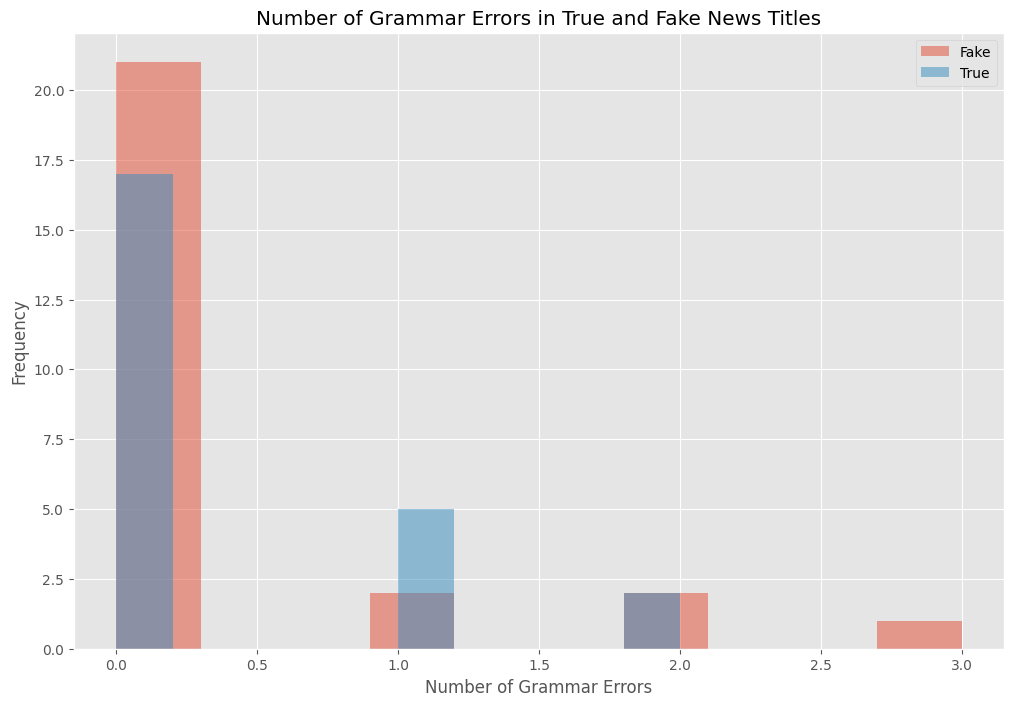

In [20]:
# Plotting the number of grammar errors in for each different label:
plt.figure(figsize=(12,8))
plt.hist(news_shortened[news_shortened['label'] == 0]['Gram_Errors'], bins=10, alpha=0.5, label='Fake')
plt.hist(news_shortened[news_shortened['label'] == 1]['Gram_Errors'], bins=10, alpha=0.5, label='True')
plt.legend(loc='upper right')
plt.title('Number of Grammar Errors in True and Fake News Titles')
plt.xlabel('Number of Grammar Errors')
plt.ylabel('Frequency')
plt.show()

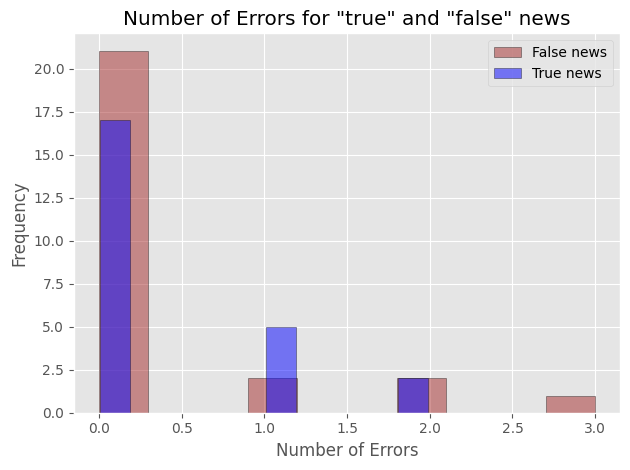

In [19]:
true = news_shortened['label']  == 1
false = news_shortened['label']  == 0
plt.style.use('ggplot')
 
plt.title('Number of Errors for "true" and "false" news')
 
plt.hist(news_shortened['Gram_Errors'][false], edgecolor='black',color='brown',rwidth=1.1,alpha=0.5,label='False news')
plt.hist(news_shortened['Gram_Errors'][true], edgecolor='black',color='blue',rwidth=0.9,alpha=0.5,label='True news')
 
plt.legend(loc='upper right')
 
plt.xlabel('Number of Errors')
plt.ylabel('Frequency')
 
plt.tight_layout()
 
plt.show()